
# Predicting the winner of UFC fights 

The goal of this project is to create a machine learing model that predicts the winner of ufc fights. UFC fights are incredibly hard to predict, fighters only tend to fight eachother if they are seen ass being about as good as each other, fighters rarely if ever fight someone they are confident they can beat unlike in boxing. This makes predicting the out come of UFC fights very difficult to predict. The UFC places the favoured fighter or the champion of the weight division in the red corner, they are right about the victor only 57% of time. Below is a description of the data that came with the data, which cam be found at https://www.kaggle.com/rajeevw/ufcdata. Unfortunately a lot of the data has been recorded/scraped incorrectly, the first one thousand fights all have the red corner winning. Most people who have used this data set on kaggle did not notice this as result there models could achieve an accuracy of 67% by just guessing Red wins every time.
### Context
This is a list of every UFC fight in the history of the organisation. Every row contains information about both fighters, fight details and the winner. The data was scraped from ufcstats website. After fightmetric ceased to exist, this came into picture. I saw that there was a lot of information on the website about every fight and every event and there were no existing ways of capturing all this. I used beautifulsoup to scrape the data and pandas to process it. It was a long and arduous process, please forgive any mistakes. I have provided the raw files in case anybody wants to process it differently. This is my first time creating a dataset, any suggestions and corrections are welcome! In case anyone wants to check out the work, I have all uploaded all the code files, including the scraping module here

Have fun!

### Content
Each row is a compilation of both fighter stats. Fighters are represented by 'red' and 'blue' (for red and blue corner). So for instance, red fighter has the complied average stats of all the fights except the current one. The stats include damage done by the red fighter on the opponent and the damage done by the opponent on the fighter (represented by 'opp' in the columns) in all the fights this particular red fighter has had, except this one as it has not occured yet (in the data). Same information exists for blue fighter. The target variable is 'Winner' which is the only column that tells you what happened. Here are some column definitions:

### Column definitions:

|Column name  |Description |
|-----|-------------|
|R_ and B_ |prefix signifies red and blue corner fighter stats respectively|
|_opp_ | containing columns is the average of damage done by the opponent on the fighter|
|KD |is number of knockdowns|
|SIG_STR |is no. of significant strikes 'landed of attempted'|
|SIG_STR_pct |is significant strikes percentage|
|TOTAL_STR |is total strikes 'landed of attempted'|
|TD |is no. of takedowns|
|TD_pct |is takedown percentages|
|SUB_ATT |is no. of submission attempts|
|PASS |is no. times the guard was passed?|
|REV |*Probably reversels*|
|HEAD |is no. of significant strinks to the head 'landed of attempted'|
|BODY |is no. of significant strikes to the body 'landed of attempted'|
|CLINCH |is no. of significant strikes in the clinch 'landed of attempted'|
|GROUND |is no. of significant strikes on the ground 'landed of attempted'|
|win_by |is method of win|
|last_round |is last round of the fight (ex. if it was a KO in 1st, then this will be 1)|
|last_round_time |is when the fight ended in the last round|
|Format |is the format of the fight (3 rounds, 5 rounds etc.)|
|Referee |is the name of the Ref|
|date |is the date of the fight|
|location |is the location in which the event took place|
|Fight_type |is which weight class and whether it's a title bout or not|
|Winner |is the winner of the fight|
|Stance |is the stance of the fighter (orthodox, southpaw, etc.)|
|Height_cms |is the height in centimeter|
|Reach_cms |is the reach of the fighter (arm span) in centimeter|
|Weight_lbs |is the weight of the fighter in pounds (lbs)|
|age |is the age of the fighter|
|title_bout |Boolean value of whether it is title fight or not|
|weight_class |is which weight class the fight is in (Bantamweight, heavyweight, Women's flyweight, etc.)|
|no_of_rounds |is the number of rounds the fight was scheduled for|
|current_lose_streak |is the count of current concurrent losses of the fighter|
|current_win_streak |is the count of current concurrent wins of the fighter|
|draw |is the number of draws in the fighter's ufc career|
|wins |is the number of wins in the fighter's ufc career|
|losses |is the number of losses in the fighter's ufc career|
|total_rounds_fought |is the average of total rounds fought by the fighter|
|total_time_fought(seconds) |is the count of total time spent fighting in seconds|
|total_title_bouts |is the total number of title bouts taken part in by the fighter|
|win_by_Decision_Majority |is the number of wins by majority judges decision in the fighter's ufc career|
|win_by_Decision_Split |is the number of wins by split judges decision in the fighter's ufc career|
|win_by_Decision_Unanimous |is the number of wins by unanimous judges decision in the fighter's ufc career|
|win_by_KO/TKO |is the number of wins by knockout in the fighter's ufc career|
|win_by_Submission |is the number of wins by submission in the fighter's ufc career|
|win_by_TKO_Doctor_Stoppage |is the number of wins by doctor stoppage in the fighter's ufc career|
|avg         | average over number of rounds in the fight |



In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import os 
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
from matplotlib import colors
plt.figure(figsize=(10,10))

from tqdm import tqdm_notebook as tqdm
#from tqdm import tqdm
%matplotlib inline

In [5]:
data=pd.read_csv("ufcdata/data.csv")
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [6]:
data.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5144.000000,5144.000000,5144.000000,5144.0,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,5144.000000,5144.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,5144.000000,3879.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5136.000000,4478.000000,5138.000000,5144.000000,5144.000000,5144.0,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,5144.000000,5144.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,5144.000000,4494.000000,5144.000000,5144.000000,5144.000000,5144.000000,51

In [7]:
PrepropData=pd.read_csv("ufcdata/preprocessed_data.csv")
PrepropData.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.20000

In [8]:
RawFighterDetails=pd.read_csv("ufcdata/raw_fighter_details.csv")
RawFighterDetails.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [9]:
print("The number of non nan Reach entries is",len(list(RawFighterDetails[RawFighterDetails["Reach"]!= float("nan")])))
print("The number of non nan Stance entries is",len(list(RawFighterDetails[RawFighterDetails["Stance"]!= float("nan")])))
print("The number of non nan DOB entries is",len(list(RawFighterDetails[RawFighterDetails["DOB"]!= float("nan")])))
print("The total number of entries is ",len(RawFighterDetails["fighter_name"]))

The number of non nan Reach entries is 6
The number of non nan Stance entries is 6
The number of non nan DOB entries is 6
The total number of entries is  3313


Reach,Stance and DOB will not be used from this data

In [10]:
RawTotalFightData=pd.read_csv("ufcdata/raw_total_fight_data.csv",delimiter =";")
RawTotalFightData.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [11]:
data.dropna()
data.head()


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

## Feature Engineering and Exploratory Data Analysis
Lets join the raw data processed data together first so we decide what features to use and construct. 

In [12]:
Data=data.join(RawTotalFightData,lsuffix="",rsuffix="_raw").copy()
for key in Data.keys():
    if key[-4:] == "_raw":
        print(key)
        Data=Data.drop([str(key)],axis=1)
print("These are all duplicates or will give no indication of who is going to win the fight.")
        
Data["date_time"]=pd.to_datetime(Data["date"])
Data=Data.drop(["date"],axis=1)
Data=Data.sort_values(["date_time"],ascending=True)

#there is some error in the way to data is recorded the first fight winners are all red
Data=Data.reset_index(drop=True)
for index,fight in Data.iterrows():
    if fight.Winner == "Blue":
        StartPoint=index
        break
Data=Data[StartPoint:]
Data=Data.reset_index(drop=True)
display(Data)
AllData=Data

R_fighter_raw
B_fighter_raw
Referee_raw
date_raw
location_raw
Winner_raw
These are all duplicates or will give no indication of who is going to win the fight.


,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Fight_type,date_time
0,Brandon Vera,Jon Jones,Herb Dean,"Broomfield, Colorado, USA",Blue,False,Light Heavyweight,3,1.0,0.0,0.0,15.500000,11.250000,20.250000,12.750000,45.000000,14.750000,19.500000,11.500000,61.750000,23.250000,0.250000,7.500000,4.500000,2.000000,0.000000,84.750000,39.000000,0.477500,0.250000,4.000000,2.500000,0.525000,102.750000,54.500000,3.0,1.0,8.250000,5.250000,19.500000,10.750000,41.500000,10.750000,0.250000,0.250000,43.500000,9.750000,0.00,9.500000,6.750000,0.000000,0.00,61.250000,21.750000,0.332500,0.000000,2.000000,0.000000,0.000000,74.750000,34.500,9.0,629.250000,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,Orthodox,193.04,213.36,205.0,1.0,0.0,0.0,9.727273,7.454545,15.090909,11.636364,37.090909,16.181818,3.727273,2.909091,32.909091,11.454545,0.636364,13.272727,11.818182,0.454545,0.000000,55.909091,30.727273,0.572727,0.090909,0.909091,0.545455,0.363636,64.545455,38.636364,4.0,4.0,6.545455,5.000000,19.545455,13.090909,33.454545,9.454545,4.454545,2.272727,41.636364,12.181818,0.090909,9.272727,7.636364,0.363636,0.000000,57.454545,24.818182,0.419091,0.000000,2.909091,0.818182,0.272727,77.636364,43.818

In [13]:
display(AllData.head(0))

,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Fight_type,date_time


We will use the data frame above to calculate the features for all the fights. We will calculate historical features about each fighter. Such as:

* **Probability of landing a significant strike**. This will be the number of significant strikes a fighter has landed over the number they have thrown.
* **Significant strike rate.** The rate at which a fighter attempts to land significant strikes. Preferably per second but could be given per round if necessary.
* **Probability of landing a strike**
* **Strike Rate**
* **Probability of landing a takedown.** A takedown is where one fighter wrestles the other fighter to the ground.
* **Takedown attempt rate.**
* **Takedown,Significant Strike and Strike defence probability**. The probability of defending the attack method based on historical fights.  
* **Knock down rate**. A knock down is when one fighter knocks anther one down with a strike. 
* **Win probability**
* **total number of fights**
* **Age**
* **How many title bouts the fighter has been in**
* **Network Centrality.** A network will be constructed using networkx and the an eigenvector centrality score score will be calculated for every fighter, we will start with katz centrality but may use some others later like PageRank. We will begin with creating a network for all the fighters and one for each weight class. For a fight we will consider each fighters score for the network of all fighters and their score in the weight class of the fights. 
* **Finnish rate**. In MMA finishing an opponent is when one fighter knocks out or taps out an opponent. Clearly a fighter has knocked out every opponent they have faced in the first round they are good fighter. This feature will be number of finishes over total fight time.
* **Current loss streak**
* **Current win streak** 


For training and testing it makes sense to split the fights chronologically rather than randomly. Training the algorithms on the oldest fights and testing them on more recent ones. 

Some other features we may include later are:
* **Reach difference**  A fighters reach is the distance between their fingertips when they hold the arms apart and parallel to the ground. Reach can approximate the distance a fighter can punch at.  
* **Height difference** Will give and indication who is punching with and who is punching against gravity. 

Lets work throw away any data we do not need to calculate the above features. 

In [14]:
CorneredThingsToKeep=["fighter","current_lose_streak","current_win_streak","wins",
                      "losses","draw","age","SIG_STR.","TOTAL_STR.","TD","total_title_bouts",
                     "win_by_KO/TKO","KD","total_time_fought(seconds)"]

ThingsToKeep=["Winner","win_by","last_round","last_round_time","date_time"]
for thing in CorneredThingsToKeep:
    ThingsToKeep.append("R_"+thing)
    ThingsToKeep.append("B_"+thing)
Data=AllData[ThingsToKeep]
display(Data.head(1))

,Winner,win_by,last_round,last_round_time,date_time,R_fighter,B_fighter,R_current_lose_streak,B_current_lose_streak,R_current_win_streak,B_current_win_streak,R_wins,B_wins,R_losses,B_losses,R_draw,B_draw,R_age,B_age,R_SIG_STR.,B_SIG_STR.,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_total_title_bouts,B_total_title_bouts,R_win_by_KO/TKO,B_win_by_KO/TKO,R_KD,B_KD,R_total_time_fought(seconds),B_total_time_fought(seconds)
0,Blue,KO/TKO,1,3:19,2010-03-21,Brandon Vera,Jon Jones,1.0,1.0,0.0,0.0,7.0,3.0,4.0,1.0,0.0,0.0,32.0,22.0,5 of 8,11 of 17,7 of 11,26 of 33,0 of 0,2 of 3,0.0,0.0,4.0,0.0,0,0,543.818182,629.25


First lets adjust our columns to give total numbers of strikes,takedowns etc.

In [15]:
def ConvertToLandedAttempted(DF,Feature):
    for corner in ["R_","B_"]:
        try:
            DF[[corner+Feature+"_landed",corner+Feature+"_attempted"]] = DF[corner+Feature].str.split(" of ",expand=True)
            for label in [corner+Feature+"_landed",corner+Feature+"_attempted"]:
                DF[label]=pd.to_numeric(DF[label])
            DF=DF.drop([corner+Feature],axis=1)
        except:
            pass
    return DF

FeaturesToSplit=["SIG_STR.","TOTAL_STR.","TD"]
    
for feat in FeaturesToSplit:
    Data=ConvertToLandedAttempted(Data,feat)

for corner in ["R_","B_"]:
    try:
        Data[corner+"total_no._fights"]=pd.to_numeric(Data[corner+"draw"]+Data[corner+"wins"]+Data[corner+"losses"])
        Data=Data.drop([corner+"draw",corner+"losses"],axis=1)
    except:
        pass
    
    
Data.head().T

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4
Winner,Blue,Red,Red,Red,Red
win_by,KO/TKO,KO/TKO,KO/TKO,KO/TKO,Submission
last_round,1,1,3,1,2
last_round_time,3:19,3:53,1:16,3:01,3:40
date_time,2010-03-21 00:00:00,2010-03-21 00:00:00,2010-03-21 00:00:00,2010-03-21 00:00:00,2010-03-21 00:00:00
R_fighter,Brandon Vera,Junior Dos Santos,Cheick Kongo,Alessio Sakara,Clay Guida
B_fighter,Jon Jones,Gabriel Gonzaga,Paul Buentello,James Irvin,Shannon Gugerty
R_current_lose_streak,1,0,2,0,2
B_current_lose_streak,1,0,1,1,1
R_current_win_streak,0,4,0,2,0


In [16]:
Data[(Data.R_fighter == "Jon Jones") | (Data.B_fighter == "Jon Jones")][["R_fighter","B_fighter","R_total_time_fought(seconds)","B_total_time_fought(seconds)","date_time"]]

,R_fighter,B_fighter,R_total_time_fought(seconds),B_total_time_fought(seconds),date_time
0,Brandon Vera,Jon Jones,543.818182,629.250000,2010-03-21
96,Jon Jones,Vladimir Matyushenko,543.200000,781.285714,2010-08-01
236,Jon Jones,Ryan Bader,471.333333,713.600000,2011-02-05
268,Mauricio Rua,Jon Jones,748.800000,484.000000,2011-03-19
406,Jon Jones,Rampage Jackson,518.125000,827.000000,2011-09-24
490,Jon Jones,Lyoto Machida,568.777778,725.090909,2011-12-10
599,Jon Jones,Rashad Evans,568.500000,779.285714,2012-04-21
743,Jon Jones,Vitor Belfort,653.181818,303.933333,2012-09-22
970,Jon Jones,Chael Sonnen,678.250000,704.545455,2013-04-27
1117,Jon Jones,Alexander Gustafsson,647.076923,438.875000,2013-09-21


Total fight time isn't working so lets drop it.

In [17]:
Data=Data.drop([corner+"_total_time_fought(seconds)" for corner in ["R","B"]],axis=1)

In [18]:
Data.head(2)

,Winner,win_by,last_round,last_round_time,date_time,R_fighter,B_fighter,R_current_lose_streak,B_current_lose_streak,R_current_win_streak,B_current_win_streak,R_wins,B_wins,R_age,B_age,R_total_title_bouts,B_total_title_bouts,R_win_by_KO/TKO,B_win_by_KO/TKO,R_KD,B_KD,R_SIG_STR._landed,R_SIG_STR._attempted,B_SIG_STR._landed,B_SIG_STR._attempted,R_TOTAL_STR._landed,R_TOTAL_STR._attempted,B_TOTAL_STR._landed,B_TOTAL_STR._attempted,R_TD_landed,R_TD_attempted,B_TD_landed,B_TD_attempted,R_total_no._fights,B_total_no._fights
0,Blue,KO/TKO,1,3:19,2010-03-21,Brandon Vera,Jon Jones,1.0,1.0,0.0,0.0,7.0,3.0,32.0,22.0,0.0,0.0,4.0,0.0,0,0,5,8,11,17,7,11,26,33,0,0,2,3,11.0,4.0
1,Red,KO/TKO,1,3:53,2010-03-21,Junior Dos Santos,Gabriel Gonzaga,0.0,0.0,4.0,1.0,4.0,7.0,26.0,30.0,0.0,1.0,4.0,5.0,1,0,20,35,9,19,20,35,9,19,0,0,1,1,4.0,10.0


In [ ]:
# now lets create totals for all the revelevent factors

CorneredThingsToKeep=["fighter","current_lose_streak","current_win_streak","wins",
                      "losses","draw","age","SIG_STR.","TOTAL_STR.","TD","total_title_bouts",
                     "win_by_KO/TKO","KD","total_time_fought(seconds)"]

ThingsToKeep=["Winner","win_by","last_round","last_round_time","date_time"]

ThingstoTotal=["SIG_STR.","TOTAL_STR.","TD"]

for corner in ["R_","B_"]:
    for feature in ThingstoTotal:
        for Type in ["_attempted","_landed"]:
            stat=corner+feature+Type
            Data[stat+"_total"]=np.zeros(len(Data))
            
            
for index,fight in tqdm(Data.iterrows(),total=len(Data)):
    for corner in ["R_","B_"]:
        for feature in ThingstoTotal:
            for Type in ["_attempted","_landed"]:
                stat=corner+feature+Type
                fighter=str(fight[corner+"fighter"])
                
                #find the index of the previou fight involving the fighter 
                PreviousFighterFights=Data[(Data.R_fighter == fighter) | (Data.B_fighter == fighter)]
                PreviousFightsIndex=PreviousFighterFights[PreviousFighterFights.index < index].index
                if len(PreviousFightsIndex)> 0:
                    PrevIndex=PreviousFightsIndex[-1]
                else:
                    continue 
                PrevCorner="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                PrevStatLabel=PrevCorner+feature+Type
                PrevTotal=Data[PrevStatLabel+"_total"][PrevIndex] 
                PrevStat=Data[PrevStatLabel][PrevIndex]
                Data[stat+"_total"][index]=PrevTotal+PrevStat
                
def TestIfWorking(Data,Features):
    display(Data[(Data.R_fighter == "Jon Jones") | (Data.B_fighter == "Jon Jones")][["R_fighter","B_fighter",*Features]])
                
pd.to_pickle(Data,"ufcdata/Checkpoint1")

In [24]:
def TestIfWorking(Data,Features):
    display(Data[(Data.R_fighter == "Jon Jones") | (Data.B_fighter == "Jon Jones")][["R_fighter","B_fighter"]+Features])
            
TestIfWorking(Data,[corner+"SIG_STR._attempted_total" for corner in ["R_","B_"]]+[corner+"SIG_STR._attempted" for corner in ["R_","B_"]])            

,R_fighter,B_fighter,R_SIG_STR._attempted_total,B_SIG_STR._attempted_total,R_SIG_STR._attempted,B_SIG_STR._attempted
0,Brandon Vera,Jon Jones,0.0,0.0,8,17
96,Jon Jones,Vladimir Matyushenko,17.0,91.0,16,5
236,Jon Jones,Ryan Bader,33.0,127.0,42,24
268,Mauricio Rua,Jon Jones,28.0,75.0,40,113
406,Jon Jones,Rampage Jackson,188.0,224.0,117,44
490,Jon Jones,Lyoto Machida,305.0,109.0,53,38
599,Jon Jones,Rashad Evans,358.0,311.0,214,151
743,Jon Jones,Vitor Belfort,572.0,69.0,110,36
970,Jon Jones,Chael Sonnen,682.0,339.0,27,15
1117,Jon Jones,Alexander Gustafsson,709.0,628.0,217,288


In [32]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import os 
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
from matplotlib import colors
plt.figure(figsize=(10,10))

from tqdm import tqdm_notebook as tqdm
#from tqdm import tqdm
%matplotlib inline

Data=pd.read_pickle("ufcdata/Checkpoint1.pkl")

Now we will crate total fight time so we can calculate the rates. 

In [33]:
Data["last_round_time"]=[int(minutes)*60 + int(seconds) for minutes,seconds in Data.last_round_time.str.split(":")]
Data.last_round=pd.to_numeric(Data.last_round)
Data["fight_time"]=(Data.last_round-1)*60*5+Data.last_round_time


#totalling the time
def TotalStat(Stats,Data,CornerDependence=True,Descriptor=""):
    if type(Stats)==str:
        Stats=[Stats]
    for stat in Stats:
        for corner in ["R_","B_"]:
            try:
                Data[corner+stat+Descriptor+"_total"]
            except:
                Data[corner+stat+Descriptor+"_total"]=np.zeros(len(Data))
        for index,fight in tqdm(Data.iterrows(),total=len(Data),desc="Totaling "+stat):
            for corner in ["R_","B_"]:
                fighter=str(fight[corner+"fighter"])
                PreviousFighterFights=Data[(Data.R_fighter == fighter) | (Data.B_fighter == fighter)]
                PreviousFightsIndex=PreviousFighterFights[PreviousFighterFights.index < index].index
                if len(PreviousFightsIndex)> 0:
                    PrevIndex=PreviousFightsIndex[-1]
                else:
                    continue
                if CornerDependence==True:
                    PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                    PrevCorner="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                elif CornerDependence==False:
                    PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                    PrevCorner=""
                elif CornerDependece == "Reverse":
                    PrevCorner="B_" if Data["R_fighter"][PrevIndex] == fighter else "R_"
                    PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                Data[corner+stat+Descriptor+"_total"][index]=Data[PrevCornerTotal+stat+Descriptor+"_total"][PrevIndex]+Data[PrevCorner+stat][PrevIndex]
    return Data


            
Data=TotalStat("fight_time",Data,CornerDependence=False)



TestIfWorking(Data,[corner+"fight_time"+"_total" for corner in ["R_","B_"] ]+["fight_time"])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,R_fighter,B_fighter,R_fight_time_total,B_fight_time_total,fight_time
0,Brandon Vera,Jon Jones,0.0,0.0,199
96,Jon Jones,Vladimir Matyushenko,199.0,900.0,112
236,Jon Jones,Ryan Bader,311.0,900.0,560
268,Mauricio Rua,Jon Jones,215.0,871.0,757
406,Jon Jones,Rampage Jackson,1628.0,2700.0,974
490,Jon Jones,Lyoto Machida,2602.0,1480.0,566
599,Jon Jones,Rashad Evans,3168.0,2988.0,1500
743,Jon Jones,Vitor Belfort,4668.0,606.0,954
970,Jon Jones,Chael Sonnen,5622.0,3236.0,273
1117,Jon Jones,Alexander Gustafsson,5895.0,3470.0,1500


In [34]:
#totaling the defensive stats

def TotalDefenceStat(Stats,Data,CornerDependence="Reverse"):
    if type(Stats)==str:
        Stats=[Stats]
    for stat in Stats:
        for ending,Descriptor in [["_attempted","_faced"],["_landed","_defended"]]:
            StatEnd=stat+ending
            for corner in ["R_","B_"]:
                try:
                    Data[corner+stat+Descriptor+"_total"]
                except:
                    Data[corner+stat+Descriptor+"_total"]=np.zeros(len(Data))
            for index,fight in tqdm(Data.iterrows(),total=len(Data),desc="Totaling "+stat):
                for corner in ["R_","B_"]:
                    fighter=str(fight[corner+"fighter"])
                    PreviousFighterFights=Data[(Data.R_fighter == fighter) | (Data.B_fighter == fighter)]
                    PreviousFightsIndex=PreviousFighterFights[PreviousFighterFights.index < index].index
                    if len(PreviousFightsIndex)> 0:
                        PrevIndex=PreviousFightsIndex[-1]
                    else:
                        continue
                    if CornerDependence==True:
                        PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                        PrevCorner="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                    elif CornerDependence==False:
                        PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                        PrevCorner=""
                    elif CornerDependence == "Reverse":
                        PrevCorner="B_" if Data["R_fighter"][PrevIndex] == fighter else "R_"
                        PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                    if Descriptor == "_faced":
                        Data[corner+stat+Descriptor+"_total"][index]=Data[PrevCornerTotal+stat+Descriptor+"_total"][PrevIndex]+Data[PrevCorner+StatEnd][PrevIndex]
                    else:
                        Data[corner+stat+Descriptor+"_total"][index]=Data[PrevCornerTotal+stat+Descriptor+"_total"][PrevIndex]+(Data[PrevCorner+stat+"_attempted"][PrevIndex]-Data[PrevCorner+StatEnd][PrevIndex])
    return Data

Features=[stat for stat in ["SIG_STR.","TOTAL_STR.","TD"]]




    
Data=TotalDefenceStat(Features,Data)
TestIfWorking(Data,[key for key in Data.keys() if "SIG_STR." in key])
pd.to_pickle(Data,"ufcdata/Checkpoint2.pkl")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,R_fighter,B_fighter,R_SIG_STR._landed,R_SIG_STR._attempted,B_SIG_STR._landed,B_SIG_STR._attempted,R_SIG_STR._attempted_total,R_SIG_STR._landed_total,B_SIG_STR._attempted_total,B_SIG_STR._landed_total,R_SIG_STR._faced_total,B_SIG_STR._faced_total,R_SIG_STR._defended_total,B_SIG_STR._defended_total
0,Brandon Vera,Jon Jones,5,8,11,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Jon Jones,Vladimir Matyushenko,15,16,0,5,17.0,11.0,91.0,28.0,8.0,97.0,3.0,78.0
236,Jon Jones,Ryan Bader,20,42,5,24,33.0,26.0,127.0,42.0,13.0,127.0,8.0,99.0
268,Mauricio Rua,Jon Jones,9,40,75,113,28.0,17.0,75.0,46.0,11.0,37.0,2.0,27.0
406,Jon Jones,Rampage Jackson,61,117,16,44,188.0,121.0,224.0,88.0,77.0,188.0,58.0,94.0
490,Jon Jones,Lyoto Machida,24,53,13,38,305.0,182.0,109.0,57.0,121.0,100.0,86.0,62.0
599,Jon Jones,Rashad Evans,105,214,45,151,358.0,206.0,311.0,139.0,159.0,271.0,111.0,198.0
743,Jon Jones,Vitor Belfort,65,110,16,36,572.0,311.0,69.0,32.0,310.0,35.0,217.0,24.0
970,Jon Jones,Chael Sonnen,20,27,6,15,682.0,376.0,339.0,179.0,346.0,181.0,237.0,105.0
1117,Jon Jones,Alexander Gustafsson,134,217,110,288,709.0,396.0,628.0,227.0,361.0,291.0,246.0,163.0


In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import os 
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
from matplotlib import colors
plt.figure(figsize=(10,10))

from tqdm import tqdm_notebook as tqdm
#from tqdm import tqdm
%matplotlib inline

def TestIfWorking(Data,Features):
    display(Data[(Data.R_fighter == "Jon Jones") | (Data.B_fighter == "Jon Jones")][["R_fighter","B_fighter",*Features]])


Data=pd.read_pickle("ufcdata/Checkpoint2.pkl")

In [3]:
def TotalStat(Stats,Data,CornerDependence=True,Descriptor=""):
    if type(Stats)==str:
        Stats=[Stats]
    for stat in Stats:
        for corner in ["R_","B_"]:
            try:
                Data[corner+stat+Descriptor+"_total"]
            except:
                Data[corner+stat+Descriptor+"_total"]=np.zeros(len(Data))
        for index,fight in tqdm(Data.iterrows(),total=len(Data),desc="Totaling "+stat):
            for corner in ["R_","B_"]:
                fighter=str(fight[corner+"fighter"])
                PreviousFighterFights=Data[(Data.R_fighter == fighter) | (Data.B_fighter == fighter)]
                PreviousFightsIndex=PreviousFighterFights[PreviousFighterFights.index < index].index
                if len(PreviousFightsIndex)> 0:
                    PrevIndex=PreviousFightsIndex[-1]
                else:
                    continue
                if CornerDependence==True:
                    PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                    PrevCorner="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                elif CornerDependence==False:
                    PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                    PrevCorner=""
                elif CornerDependece == "Reverse":
                    PrevCorner="B_" if Data["R_fighter"][PrevIndex] == fighter else "R_"
                    PrevCornerTotal="R_" if Data["R_fighter"][PrevIndex] == fighter else "B_"
                Data[corner+stat+Descriptor+"_total"][index]=Data[PrevCornerTotal+stat+Descriptor+"_total"][PrevIndex]+Data[PrevCorner+stat][PrevIndex]
    return Data


Data=TotalStat("KD",Data)
TestIfWorking(Data,[key for key in Data.keys() if "KD" in key])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,R_fighter,B_fighter,R_KD,B_KD,R_KD_total,B_KD_total
0,Brandon Vera,Jon Jones,0,0,0.0,0.0
96,Jon Jones,Vladimir Matyushenko,0,0,0.0,0.0
236,Jon Jones,Ryan Bader,0,0,0.0,0.0
268,Mauricio Rua,Jon Jones,0,1,1.0,0.0
406,Jon Jones,Rampage Jackson,0,0,1.0,1.0
490,Jon Jones,Lyoto Machida,1,0,1.0,1.0
599,Jon Jones,Rashad Evans,0,0,2.0,0.0
743,Jon Jones,Vitor Belfort,1,0,2.0,2.0
970,Jon Jones,Chael Sonnen,0,0,3.0,0.0
1117,Jon Jones,Alexander Gustafsson,0,0,3.0,4.0


In [5]:
#calculting the finnish probability for each fighter 
# we will do this by totaling number of finnishes and then dividing by total fight time
display("The different win_by options ",Data.win_by.unique())

def IsFinnish(DF,corner="Undefined"):
    CornerPrefix="R_" if corner=="Red" else "B_"
    if DF["Winner"]==corner and DF["win_by"] in ['KO/TKO', 'Submission']:
        return 1
    return 0

for corner in ["Red","Blue"]:        
    Data[corner[0]+"_finish"]=Data.apply(IsFinnish,**{"corner":corner},axis=1)

Data=TotalStat("finish",Data)
TestIfWorking(Data,[key for key in Data.keys() if "finish" in key ])

'The different win_by options '

array(['KO/TKO', 'Submission', 'Decision - Unanimous', 'Decision - Split',
       'DQ', "TKO - Doctor's Stoppage", 'Decision - Majority',
       'Overturned', 'Could Not Continue'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,R_fighter,B_fighter,R_finish,B_finish,R_finish_total,B_finish_total
0,Brandon Vera,Jon Jones,0,1,0.0,0.0
96,Jon Jones,Vladimir Matyushenko,1,0,1.0,0.0
236,Jon Jones,Ryan Bader,1,0,2.0,0.0
268,Mauricio Rua,Jon Jones,0,1,1.0,3.0
406,Jon Jones,Rampage Jackson,1,0,4.0,0.0
490,Jon Jones,Lyoto Machida,1,0,5.0,1.0
599,Jon Jones,Rashad Evans,0,0,6.0,1.0
743,Jon Jones,Vitor Belfort,1,0,6.0,2.0
970,Jon Jones,Chael Sonnen,1,0,7.0,1.0
1117,Jon Jones,Alexander Gustafsson,0,0,8.0,4.0


Now we can construct all our features.

In [6]:
Features=[]
for corner in ["R_","B_"]:
    for AttackForm in ["SIG_STR.","TOTAL_STR.","TD"]:
        Data[corner+AttackForm+"_probability"]=Data[corner+AttackForm+"_landed_total"]/Data[corner+AttackForm+"_attempted_total"]
        Features.append(AttackForm+"_probability")
        Data[corner+AttackForm+"_defence_probability"]=Data[corner+AttackForm+"_defended_total"]/Data[corner+AttackForm+"_faced_total"]
        Features.append(AttackForm+"_defence_probability")
        Data[corner+AttackForm+"_rate"]=Data[corner+AttackForm+"_attempted_total"]/Data[corner+"fight_time"+"_total"]
        Features.append(AttackForm+"_rate")
        
    Data[corner+"KD_rate"]=Data[corner+"KD"+"_total"]/Data[corner+"fight_time"+"_total"]
    Features.append("KD_rate")
    
    Data[corner+"win_probability"]=Data[corner+"wins"]/Data[corner+"total_no._fights"]
    Features.append("win_probability")
    
    Data[corner+"finish_rate"]=Data[corner+"finish_total"]/Data[corner+"fight_time"+"_total"]
    Features.append("finish_rate")
    
    Features+=[corner+factor for factor in ["age","total_no._fights","total_title_bouts","current_win_streak","current_lose_streak"]]


In [7]:
display(Data[-10:])

,Winner,win_by,last_round,last_round_time,date_time,R_fighter,B_fighter,R_current_lose_streak,B_current_lose_streak,R_current_win_streak,B_current_win_streak,R_wins,B_wins,R_age,B_age,R_total_title_bouts,B_total_title_bouts,R_win_by_KO/TKO,B_win_by_KO/TKO,R_KD,B_KD,R_SIG_STR._landed,R_SIG_STR._attempted,B_SIG_STR._landed,B_SIG_STR._attempted,R_TOTAL_STR._landed,R_TOTAL_STR._attempted,B_TOTAL_STR._landed,B_TOTAL_STR._attempted,R_TD_landed,R_TD_attempted,B_TD_landed,B_TD_attempted,R_total_no._fights,B_total_no._fights,R_SIG_STR._attempted_total,R_SIG_STR._landed_total,R_TOTAL_STR._attempted_total,R_TOTAL_STR._landed_total,R_TD_attempted_total,R_TD_landed_total,B_SIG_STR._attempted_total,B_SIG_STR._landed_total,B_TOTAL_STR._attempted_total,B_TOTAL_STR._landed_total,B_TD_attempted_total,B_TD_landed_total,fight_time,R_fight_time_total,B_fight_time_total,R_SIG_STR._faced_total,B_SIG_STR._faced_total,R_SIG_STR._defended_total,B_SIG_STR._defended_total,R_TOTAL_STR._faced_total,B_TOTAL_STR._faced_total,R_TOTAL_STR._defended_total,B_TOTAL_STR._defended_total,R_TD_faced_total,B_TD_faced_total,R_TD_defended_total,B_TD_defended_total,R_KD_total,B_KD_total,R_finish,B_finish,R_finish_total,B_finish_total,R_SIG_STR._probability,R_SIG_STR._defence_probability,R_SIG_STR._rate,R_TOTAL_STR._probability,R_TOTAL_STR._defence_probability,R_TOTAL_STR._rate,R_TD_probability,R_TD_defence_probability,R_TD_rate,R_KD_rate,R_win_probability,R_finish_rate,B_SIG_STR._probability,B_SIG_STR._defence_probability,B_SIG_STR._rate,B_TOTAL_STR._probability,B_TOTAL_STR._defence_probability,B_TOTAL_STR._rate,B_TD_probability,B_TD_defence_probability,B_TD_rate,B_KD_rate,B_win_probability,B_finish_rate
3846,Blue,Decision - Unanimous,3,300,2019-06-08,Tai Tuivasa,Blagoy Ivanov,1.0,0.0,0.0,1.0,3.0,1.0,26.0,32.0,0.0,0.0,2.0,0.0,0,1,64,144,73,123,66,146,81,131,0,0,2,2,4.0,2.0,249.0,130.0,254.0,131.0,2.0,0.0,407.0,123.0,408.0,124.0,0.0,0.0,900,1763.0,2400.0,220.0,411.0,130.0,231.0,242.0,411.0,131.0,231.0,4.0,1.0,4.0,1.0,2.0,0.0,0,0,2.0,0.0,0.522088,0.590909,0.141237,0.515748,0.541322,0.144073,0.000000,1.000000,0.001134,0.001134,0.750000,0.001134,0.302211,0.562044,0.169583,0.303922,0.562044,0.170000,NaN,1.000000,0.000000,0.000000,0.500000,0.000000
3847,Red,Decision - Unanimous,3,300,2019-06-08,Tatiana Suarez,Nina Ansaroff,0.0,0.0,4.0,4.0,4.0,4.0,28.0,33.0,1.0,0.0,1.0,0.0,0,0,75,142,48,99,95,166,54,105,4,13,0,0,4.0,6.0,232.0,171.0,406.0,322.0,22.0,18.0,961.0,451.0,1101.0,574.0,5.0,2.0,900,2160.0,5319.0,45.0,660.0,19.0,367.0,152.0,789.0,46.0,377.0,2.0,36.0,2.0,29.0,0.0,0.0,0,0,3.0,1.0,0.737069,0.422222,0.107407,0.793103,0.302632,0.187963,0.818182,1.000000,0.010185,0.000000,1.000000,0.001389,0.469303,0.556061,0.180673,0.521344,0.477820,0.206994,0.400000,0.805556,0.000940,0.000000,0.666667,0.000188
3848,Blue,KO/TKO,1,246,2019-06-08,Ricardo Lamas,Calvin Kattar,0.0,0.0,1.0,1.0,10.0,3.0,37.0,31.0,1.0,0.0,4.0,2.0,0,1,12,29,22,41,12,29,22,41,0,1,0,0,15.0,4.0,1026.0,484.0,1200.0,653.0,56.0,16.0,542.0,225.0,557.0,236.0,6.0,2.0,246,9361.0,2683.0,1062.0,669.0,623.0,371.0,1330.0,675.0,652.0,372.0,30.0,4.0,13.0,3.0,2.0,2.0,0,1,7.0,2.0,0.471735,0.586629,0.109604,0.544167,0.490226,0.128191,0.285714,0.433333,0.005982,0.000214,0.666667,0.000748,0.415129,0.554559,0.202013,0.423698,0.551111,0.207603,0.333333,0.750000,0.002236,0.000745,0.750000,0.000745
3849,Blue,Decision - Unanimous,3,300,2019-06-08,Karolina Kowalkiewicz,Alexa Grasso,2.0,1.0,0.0,0.0,5.0,2.0,33.0,25.0,1.0,0.0,0.0,0.0,0,0,90,232,148,369,92,234,163,384,0,0,0,0,9.0,4.0,1684.0,662.0,1901.0,855.0,7.0,1.0,505.0,215.0,662.0,350.0,2.0,1.0,900,7201.0,2864.0,1398.0,455.0,792.0,308.0,1537.0,531.0,800.0,316.0,43.0,22.0,36.0,14.0,0.0,0.0,0,0,0.0,0.0,0.393112,0.566524,0.233856,0.449763,0.520494,0.263991,0.142857,0.837209,0.000972,0.000000,0.555556,0.000000,0.425743,0.676923,0.176327,0.528701,0.595104,0.231145,0.500000,0.636364,0.000698,0.000000,0.500000,0.000000
3850,Red,Decision - Unanimous,3,300,2019-06-08,Yan Xiaonan,Angela Hill,0.0,0.0,3.0,

It will be best to fill the NaNs in with medians. We will also remove fights that where won by (win_by in the Data Frame)  disqualification (DQ), doctors stoppage (TKO - Doctor's Stoppage), and if the decision is overturned (Overturned). These fights can be considered anomalous. Then we will set (Winner) to 1 if red wins and 0 if blue wins. The can train some algorithms before calculating centrality scores for the fighters.  

In [8]:
Data=Data[~Data.win_by.isin(["DQ","TKO - Doctor's Stoppage","Overturned"])]

def BinaryWinner(DF):
    if DF["Winner"]=="Red":
        return 1
    elif DF["Winner"]=="Blue":
        return 0 
    else:
        return np.nan
Data["Winner"]=Data.apply(BinaryWinner,axis=1)
Data.head()
pd.to_pickle(Data,"ufcdata/Checkpoint3.pkl")

In [9]:
# ceckpoint 3

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import os 
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
from matplotlib import colors
plt.figure(figsize=(10,10))

from tqdm import tqdm_notebook as tqdm
#from tqdm import tqdm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Features=[]
for AttackForm in ["SIG_STR.","TOTAL_STR.","TD"]:
    Features.append(AttackForm+"_probability")
    Features.append(AttackForm+"_defence_probability")
    Features.append(AttackForm+"_rate")
Features.append("KD_rate")
Features.append("win_probability")
Features.append("finish_rate")
Features+=[factor for factor in ["age","total_no._fights","total_title_bouts","current_win_streak","current_lose_streak"]]
Features=[corner+feat for corner in ["R_","B_"] for feat in Features]
print(Features)

Data=pd.read_pickle("ufcdata/Checkpoint3.pkl")


['R_SIG_STR._probability', 'R_SIG_STR._defence_probability', 'R_SIG_STR._rate', 'R_TOTAL_STR._probability', 'R_TOTAL_STR._defence_probability', 'R_TOTAL_STR._rate', 'R_TD_probability', 'R_TD_defence_probability', 'R_TD_rate', 'R_KD_rate', 'R_win_probability', 'R_finish_rate', 'R_age', 'R_total_no._fights', 'R_total_title_bouts', 'R_current_win_streak', 'R_current_lose_streak', 'B_SIG_STR._probability', 'B_SIG_STR._defence_probability', 'B_SIG_STR._rate', 'B_TOTAL_STR._probability', 'B_TOTAL_STR._defence_probability', 'B_TOTAL_STR._rate', 'B_TD_probability', 'B_TD_defence_probability', 'B_TD_rate', 'B_KD_rate', 'B_win_probability', 'B_finish_rate', 'B_age', 'B_total_no._fights', 'B_total_title_bouts', 'B_current_win_streak', 'B_current_lose_streak']


In [10]:
print(len(Data.dropna())*100.0/len(Data),"% of the fights don't have NaN in them")
print(Data.Winner.mean()*100,"% of the fights were won ")

50.13220518244315 % of the fights don't have NaN in them
57.90176187933797 % of the fights were won 


In reality if this model was to be used new it would have access to historical data only this means so lets test on the most recent fights and train ton the older fights. As we would lose half the data if we dropped NaN rows lets fill NaNs with median for that column. 

In [61]:
Data=pd.read_pickle("ufcdata/Checkpoint3.pkl")
Data=Data.fillna(Data.median())

CutOffPoint=int(0.8*len(Data))

TransformData=StandardScaler()

Train=Data[:CutOffPoint]
Test=Data[CutOffPoint:]



TrainX=Train[Features].copy()
TrainY=Train["Winner"].copy()

TestX=Test[Features].copy()
TestY=Test["Winner"].copy()

TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

print("For a SVC")
Model=SVC(gamma="auto",kernel="rbf")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Random Forrest")
Model=RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True,max_features=5)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Decision Tree")
Model=RandomForestClassifier(n_estimators=1,n_jobs=-1)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For KNN")
Model=KNeighborsClassifier(n_neighbors=5,weights="uniform")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("The Red corner won",np.mean(TestY)*100,"% of the test fights and",np.mean(TrainY)*100,"% of the training fights")

For a SVC
We get an accuracy of 0.6657851239669421 on the training set
We get an accuracy of  0.5455746367239102 on the test set

For a Random Forrest
We get an accuracy of 0.9907438016528926 on the training set
We get an accuracy of  0.5667107001321003 on the test set

For a Decision Tree
We get an accuracy of 0.8277685950413223 on the training set
We get an accuracy of  0.5257595772787318 on the test set

For KNN
We get an accuracy of 0.7067768595041323 on the training set
We get an accuracy of  0.523117569352708 on the test set

The Red corner won 53.6327608982827 % of the test fights and 59.47107438016529 % of the training fights


Lets see what kind of accuracy we get if we drop the NaNs.

In [62]:
Data=pd.read_pickle("ufcdata/Checkpoint3.pkl")
Data=Data.dropna()
print("We have",len(Data),"fights")
CutOffPoint=int(0.8*len(Data))

TransformData=StandardScaler()

Train=Data[:CutOffPoint]
Test=Data[CutOffPoint:]



TrainX=Train[Features].copy()
TrainY=Train["Winner"].copy()

TestX=Test[Features].copy()
TestY=Test["Winner"].copy()

TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

print("For a SVC")
Model=SVC(gamma="auto",kernel="rbf")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Random Forrest")
Model=RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Decision Tree")
Model=RandomForestClassifier(n_estimators=1,n_jobs=-1,bootstrap=False)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For KNN")
Model=KNeighborsClassifier(n_neighbors=5,weights="uniform")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print

print("The Red corner won",np.mean(TestY)*100,"% of the test fights and",np.mean(TrainY)*100,"% of the training fights")

We have 1896 fights
For a SVC
We get an accuracy of 0.7176781002638523 on the training set
We get an accuracy of  0.49736842105263157 on the test set

For a Random Forrest
We get an accuracy of 0.987467018469657 on the training set
We get an accuracy of  0.5421052631578948 on the test set

For a Decision Tree
We get an accuracy of 1.0 on the training set
We get an accuracy of  0.5157894736842106 on the test set

For KNN
We get an accuracy of 0.7255936675461742 on the training set
We get an accuracy of  0.49736842105263157 on the test set

The Red corner won 49.473684210526315 % of the test fights and 59.82849604221636 % of the training fights


Splitting the data on a chronological basis seems to bias splitting rather strongly so instead let's split randomly.

In [70]:
Data=pd.read_pickle("ufcdata/Checkpoint3.pkl")
Data=Data.fillna(Data.median())

print("We have",len(Data),"fights")

TransformData=StandardScaler()

TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.2)

TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

print("For a SVC")
Model=SVC(gamma="auto",kernel="rbf")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Random Forrest")
Model=RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Decision Tree")
Model=RandomForestClassifier(n_estimators=1,n_jobs=-1,bootstrap=False)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For KNN")
Model=KNeighborsClassifier(n_neighbors=5,weights="uniform")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

from sklearn.linear_model import LogisticRegression
print("For Logistic Regression")
Model=LogisticRegression(max_iter=10000,tol=0.1**10)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")


print("The Red corner won",np.mean(TestY)*100,"% of the test fights and",np.mean(TrainY)*100,"% of the training fights")

We have 3782 fights
For a SVC
We get an accuracy of 0.6717355371900826 on the training set
We get an accuracy of  0.5904887714663144 on the test set

For a Random Forrest
We get an accuracy of 0.980495867768595 on the training set
We get an accuracy of  0.5548216644649934 on the test set

For a Decision Tree
We get an accuracy of 0.991404958677686 on the training set
We get an accuracy of  0.535006605019815 on the test set

For KNN
We get an accuracy of 0.6998347107438017 on the training set
We get an accuracy of  0.583883751651255 on the test set

For Logistic Regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We get an accuracy of 0.6145454545454545 on the training set
We get an accuracy of  0.6023778071334214 on the test set

The Red corner won 58.388375165125495 % of the test fights and 58.28099173553719 % of the training fights


It makes sens to split randomly to reduce the bias. The UFC puts the favoured fighter in the Red corner and it seems they may have changed how they decide who is the favoured fighter. We appear to get better results when we replace NaNs with median as well. Most of the NaNs occur for a fighters first fight as they we have we don't have any data for them in previous fights. All models all less accurate or only marginally more accurate than guessing red for every fight. Now I will construct networks of all the fights and calculate the centralities of the networks. 

The following code takes a while to run so the results are saved and displayed.
```python
Data=pd.read_pickle("ufcdata/Checkpoint3.pkl")
FightNetwork=nx.MultiDiGraph()
for index,fight in tqdm(Data.iterrows(),total=len(Data)):
    if fight.Winner == 1:
        FightNetwork.add_edge(fight.B_fighter,fight.R_fighter,key=fight.date_time)
    elif fight.Winner == 0:
        FightNetwork.add_edge(fight.R_fighter,fight.B_fighter,key=fight.date_time)
fig=plt.figure(figsize=(12,12),dpi=200)
nx.draw(FightNetwork,pos=nx.spring_layout(FightNetwork,k=0.4),arrowsize=0.1,font_size=1,width=0.02,node_size=0,with_labels=True)

fig.savefig("graphs/FightNetwork")
nx.write_gpickle(FightNetwork,"networks/FightNetwork.gpickle")
```

![](graphs/FightNetwork.png)

It takes a long time to calculate the centrality scores so instead of recalculating after every fight we will train for all fights on the same day. 

In [12]:
FightNetwork=nx.read_gpickle("networks/FightNetwork.gpickle")
Centralities=nx.katz_centrality(nx.DiGraph(FightNetwork),tol=0.001)

In [13]:
%%time
Centralities=nx.katz_centrality(nx.DiGraph(FightNetwork),tol=0.001)

Wall time: 111 ms


In [14]:
%%time
Centralities=nx.katz_centrality(nx.DiGraph(FightNetwork),tol=0.001,alpha=0.1,beta=1)

Wall time: 112 ms


In [15]:
def PrintScores(Scores,number):
    for i in  sorted(Scores,key=Scores.get,reverse=True)[:number]:
        print(i,Scores[i])

PrintScores(Centralities,30)

Donald Cerrone 0.11033118601698103
Rafael Dos Anjos 0.0817240222447562
Dustin Poirier 0.07341996733156893
Jon Jones 0.07275362711007285
Max Holloway 0.07043749408793928
Tony Ferguson 0.0688207316668364
Anthony Pettis 0.06774533777046733
Demian Maia 0.06739044804903237
Charles Oliveira 0.06686121972075883
Edson Barboza 0.06547242301916772
Khabib Nurmagomedov 0.0651826878143533
Michael Johnson 0.06340337829530135
Jorge Masvidal 0.0624749872811662
Demetrious Johnson 0.06075681201461478
Stipe Miocic 0.060694167358033096
Kamaru Usman 0.060685170528237735
Conor McGregor 0.06024211463668993
Jim Miller 0.05966189851898898
Darren Elkins 0.058881337225436196
Benson Henderson 0.058694887767130936
Daniel Cormier 0.058279902951203284
Neil Magny 0.05769890314955623
Ricardo Lamas 0.05755336061229676
Cub Swanson 0.05686298338870926
Junior Dos Santos 0.05676492968193717
Tyron Woodley 0.056120914095848504
Joseph Benavidez 0.056015926339711905
Nate Diaz 0.05550759164686489
Kelvin Gastelum 0.0554746216834

In [7]:
import pandas as pd 
import numpy as np 
import networkx as nx 
from tqdm import tqdm_notebook as tqdm

Data=pd.read_pickle("ufcdata/Checkpoint3.pkl")

RedScores,BlueScores=[],[]
RedFighters,BlueFighters=[],[]
TotalCentralities=[]
Cententralities={}

FightNetwork=nx.MultiDiGraph()
SumCentralities=np.nan
Indexes=list(Data.index)
for (index,fight),NextIndex in tqdm(zip(Data.iterrows(),Indexes[1:]),total=len(Data)-1):
    try:
        RedScores.append(Cententralities[fight.R_fighter])
    except:
        RedScores+=[np.median(RedScores) if len(RedScores)>0 else np.nan]
    try:
        BlueScores.append(Cententralities[fight.B_fighter])
    except:
        BlueScores+=[np.median(BlueScores) if len(BlueScores)>0 else np.nan]
    
    if fight.Winner == 1:
        FightNetwork.add_edge(fight.B_fighter,fight.R_fighter,key=fight.date_time)
    elif fight.Winner == 0:
        FightNetwork.add_edge(fight.R_fighter,fight.B_fighter,key=fight.date_time)
    
    TotalCentralities.append(SumCentralities)    
    if fight.date_time!=Data.date_time[NextIndex]:
        Cententralities=nx.katz_centrality(nx.DiGraph(FightNetwork),tol=0.001,alpha=0.1,beta=1)
        SumCentralities=np.sum(list(Cententralities.values()))


try:
    RedScores.append(Cententralities[list(Data.R_fighter)[-1]])
except:
    RedScores+=[np.median(RedScores)]
try:
    BlueScores.append(Cententralities[list(Data.B_fighter)[-1]])
except:
    BlueScores+=[np.median(BlueScores)]

TotalCentralities.append(TotalCentralities[-1])
    
Data["R_centrality"]=RedScores
Data["B_centrality"]=BlueScores
Data["total_centrality"]=TotalCentralities
  
    
pd.to_pickle(Data,"ufcdata/DataAndCentralities.pkl")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [17]:
Data["total_centrality"].describe()

count    3771.000000
mean       27.668954
std         6.164680
min         4.685107
25%        23.711600
50%        29.789282
75%        32.369751
max        35.120015
Name: total_centrality, dtype: float64

In [2]:
import pandas as pd 
import numpy as np 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
Data=pd.read_pickle("ufcdata/DataAndCentralities.pkl")
display(Data.head(-1))
print(len(Data))

,Winner,win_by,last_round,last_round_time,date_time,R_fighter,B_fighter,R_current_lose_streak,B_current_lose_streak,R_current_win_streak,B_current_win_streak,R_wins,B_wins,R_age,B_age,R_total_title_bouts,B_total_title_bouts,R_win_by_KO/TKO,B_win_by_KO/TKO,R_KD,B_KD,R_SIG_STR._landed,R_SIG_STR._attempted,B_SIG_STR._landed,B_SIG_STR._attempted,R_TOTAL_STR._landed,R_TOTAL_STR._attempted,B_TOTAL_STR._landed,B_TOTAL_STR._attempted,R_TD_landed,R_TD_attempted,B_TD_landed,B_TD_attempted,R_total_no._fights,B_total_no._fights,R_SIG_STR._attempted_total,R_SIG_STR._landed_total,R_TOTAL_STR._attempted_total,R_TOTAL_STR._landed_total,R_TD_attempted_total,R_TD_landed_total,B_SIG_STR._attempted_total,B_SIG_STR._landed_total,B_TOTAL_STR._attempted_total,B_TOTAL_STR._landed_total,B_TD_attempted_total,B_TD_landed_total,fight_time,R_fight_time_total,B_fight_time_total,R_SIG_STR._faced_total,B_SIG_STR._faced_total,R_SIG_STR._defended_total,B_SIG_STR._defended_total,R_TOTAL_STR._faced_total,B_TOTAL_STR._faced_total,R_TOTAL_STR._defended_total,B_TOTAL_STR._defended_total,R_TD_faced_total,B_TD_faced_total,R_TD_defended_total,B_TD_defended_total,R_KD_total,B_KD_total,R_finish,B_finish,R_finish_total,B_finish_total,R_SIG_STR._probability,R_SIG_STR._defence_probability,R_SIG_STR._rate,R_TOTAL_STR._probability,R_TOTAL_STR._defence_probability,R_TOTAL_STR._rate,R_TD_probability,R_TD_defence_probability,R_TD_rate,R_KD_rate,R_win_probability,R_finish_rate,B_SIG_STR._probability,B_SIG_STR._defence_probability,B_SIG_STR._rate,B_TOTAL_STR._probability,B_TOTAL_STR._defence_probability,B_TOTAL_STR._rate,B_TD_probability,B_TD_defence_probability,B_TD_rate,B_KD_rate,B_win_probability,B_finish_rate,R_centrality,B_centrality,total_centrality
0,0.0,KO/TKO,1,199,2010-03-21,Brandon Vera,Jon Jones,1.0,1.0,0.0,0.0,7.0,3.0,32.0,22.0,0.0,0.0,4.0,0.0,0,0,5,8,11,17,7,11,26,33,0,0,2,3,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.636364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,NaN,NaN,NaN,NaN
1,1.0,KO/TKO,1,233,2010-03-21,Junior Dos Santos,Gabriel Gonzaga,0.0,0.0,4.0,1.0,4.0,7.0,26.0,30.0,0.0,1.0,4.0,5.0,1,0,20,35,9,19,20,35,9,19,0,0,1,1,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,NaN,NaN,NaN,NaN
2,1.0,KO/TKO,3,76,2010-03-21,Cheick Kongo,Paul Buentello,2.0,1.0,0.0,0.0,7.0,3.0,34.0,36.0,0.0,1.0,4.0,2.0,0,0,53,94,3,29,137,187,5,31,9,9,0,0,11.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.636364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN
3,1.0,KO/TKO,1,181,2010-03-21,Alessio Sakara,James Irvin,0.0,1.0,2.0,0.0,5.0,4.0,28.0,31.0,0.0,0.0,3.0,3.0,1,0,13,29,6,16,13,29,6,16,0,0,0,0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
4,1.0,Submission,2,220,2010-03-21,Clay Guida,Shannon Gugerty,2.0,1.0,0.0,0.0,5.0,2.0,28.0,28.0,0.0,0.0,1.0,0.0,0,0,14,33,1,7,72,102,6,12,2,2,0,1,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

3782


In [19]:
print("The first 10 non NaN maximum centrality scores are:")
count=0
for index,fight in Data.iterrows():
    if fight.R_centrality >0 or fight.B_centrality > 0:
        print(np.nanmax([fight.R_centrality,fight.B_centrality]))
        count+=1
        if count == 10:
            break
            
print("\nThe last 10 maximum centrality scores are:")
count=0
for index,fight in Data[::-1].iterrows():
    if fight.R_centrality >0 or fight.B_centrality > 0:
        print(np.nanmax([fight.R_centrality,fight.B_centrality]))
        count+=1
        if count == 10:
            break
            
print("\nThe maximum centrality is",np.nanmax(list(Data.R_centrality)+list(Data.B_centrality)))

The first 10 non NaN maximum centrality scores are:
0.10361233481505645
0.08573602342679713
0.0792120022449773
0.0744330556476622
0.08187636121242843
0.08187636121242843
0.08187636121242843
0.08187636121242843
0.0744330556476622
0.08262069176890505

The last 10 maximum centrality scores are:
0.04813065523720784
0.04289434966298091
0.027722560544125214
0.03206263623349697
0.021702422091669143
0.025249036258184938
0.029907764930500166
0.05764077019399882
0.027353250412874827
0.02501593453485355

The maximum centrality is 0.10653365777674935


Clearly the centrality for early fights is large compared to later fights. To try and account for this I will consider the difference between centralities (Red-Blue) over the sum of them and another feature with the difference over the product.

Lets if the centralities have any validity for predicting the outcome fights. I will use the full fight network too see how well the centralities predict the result of historical fights. This is representitive how the scores could be used to in reality as we cannot use the future to predict the past.  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

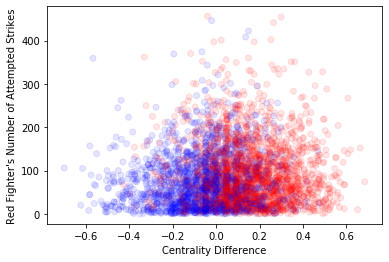

In [24]:
import matplotlib.pyplot as plt 
import random
Cententralities=nx.katz_centrality(nx.DiGraph(FightNetwork),tol=0.001,alpha=0.1,beta=1)

# R_SIG_STR._attempted is just a random thing to plot against 
CentralititesData=Data[["R_fighter","B_fighter","Winner","R_SIG_STR._attempted"]]

CentralititesData["R_centrality"]=[Cententralities[fighter] if fighter in Cententralities.keys() else np.median(list(Cententralities.values())) for fighter in list(CentralititesData["R_fighter"])]
CentralititesData["B_centrality"]=[Cententralities[fighter] if fighter in Cententralities.keys() else np.median(list(Cententralities.values())) for fighter in list(CentralititesData["B_fighter"])]
CentralititesData["centrality_difference"]=(CentralititesData["R_centrality"]-CentralititesData["B_centrality"])/(CentralititesData["R_centrality"]+CentralititesData["B_centrality"])

Winners=list(CentralititesData["Winner"])
cols=["b","r"]
winner=[0.0,1.0]
Colors=[cols[winner.index(x)] if x in [0.0,1.0] else random.choice(cols) for x in Winners]
plt.scatter(CentralititesData["centrality_difference"],CentralititesData["R_SIG_STR._attempted"],color=Colors,alpha=0.1)
plt.xlabel("Centrality Difference")
plt.ylabel("Red Fighter's Number of Attempted Strikes")

plt.show()

The centralities separate the fights well if we use the most up to data fights network now lets see if they area as predictive if we only use historical data. 

In [21]:
Data["centrality_difference/total"] = (Data["R_centrality"] - Data["B_centrality"])/Data["total_centrality"]
Data["centrality_difference/product"] = (Data["R_centrality"] - Data["B_centrality"])/(Data["R_centrality"]*Data["B_centrality"])

Features=[]
for AttackForm in ["SIG_STR.","TOTAL_STR.","TD"]:
    Features.append(AttackForm+"_probability")
    Features.append(AttackForm+"_defence_probability")
    Features.append(AttackForm+"_rate")
Features.append("KD_rate")
Features.append("win_probability")
Features.append("finish_rate")
Features+=[factor for factor in ["age","total_no._fights","total_title_bouts","current_win_streak","current_lose_streak"]]
Features=[corner+feat for corner in ["R_","B_"] for feat in Features]
Features+=["R_centrality","B_centrality","centrality_difference/total","centrality_difference/product"]
print(Features)

['R_SIG_STR._probability', 'R_SIG_STR._defence_probability', 'R_SIG_STR._rate', 'R_TOTAL_STR._probability', 'R_TOTAL_STR._defence_probability', 'R_TOTAL_STR._rate', 'R_TD_probability', 'R_TD_defence_probability', 'R_TD_rate', 'R_KD_rate', 'R_win_probability', 'R_finish_rate', 'R_age', 'R_total_no._fights', 'R_total_title_bouts', 'R_current_win_streak', 'R_current_lose_streak', 'B_SIG_STR._probability', 'B_SIG_STR._defence_probability', 'B_SIG_STR._rate', 'B_TOTAL_STR._probability', 'B_TOTAL_STR._defence_probability', 'B_TOTAL_STR._rate', 'B_TD_probability', 'B_TD_defence_probability', 'B_TD_rate', 'B_KD_rate', 'B_win_probability', 'B_finish_rate', 'B_age', 'B_total_no._fights', 'B_total_title_bouts', 'B_current_win_streak', 'B_current_lose_streak', 'R_centrality', 'B_centrality', 'centrality_difference/total', 'centrality_difference/product']


```python
import seaborn as sns 
StuffToPlot=Data[Features+["Winner"]].fillna(Data[Features+["Winner"]].median())
PairPlot=sns.pairplot(Data[Features+["Winner"]],hue="Winner",palette={1:"r",0:"b"},plot_kws={"alpha":0.03})
PairPlot.savefig("graphs/PairPlotCentrality.png",dpi=100)
```

![](graphs/PairPlotCentralityData.png)

Unfortunately the data does not appear to be very separable. We could reduce the dimensionality of the data by changing all the features to differences between the red corner and blue corner over the sum of both. The data still doesn't appear very separable. For now I will retrain the algorithms on this new data. 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Features=[]
for AttackForm in ["SIG_STR.","TOTAL_STR.","TD"]:
    Features.append(AttackForm+"_probability")
    Features.append(AttackForm+"_defence_probability")
    Features.append(AttackForm+"_rate")
Features.append("KD_rate")
Features.append("win_probability")
Features.append("finish_rate")
Features+=[factor for factor in ["age","total_no._fights","total_title_bouts","current_win_streak","current_lose_streak"]]
Features=[corner+feat for corner in ["R_","B_"] for feat in Features]
Features+=["R_centrality","B_centrality","centrality_difference/total","centrality_difference/product"]


Data=pd.read_pickle("ufcdata/DataAndCentralities.pkl")
Data["centrality_difference/total"] = (Data["R_centrality"] - Data["B_centrality"])/Data["total_centrality"]
Data["centrality_difference/product"] = (Data["R_centrality"] - Data["B_centrality"])/(Data["R_centrality"]*Data["B_centrality"])
Data=Data.fillna(Data.median())

print("We have",len(Data),"fights")

TransformData=StandardScaler()

TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.2)

TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

print("For a SVC")
Model=SVC(gamma="auto",kernel="rbf")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a polynomial SVC of degree 2")
Model=SVC(gamma="auto",kernel="poly",degree=2)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Random Forrest")
Model=RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Decision Tree")
Model=RandomForestClassifier(n_estimators=1,n_jobs=-1,bootstrap=False)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For KNN")
Model=KNeighborsClassifier(n_neighbors=5,weights="uniform")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For Logistic Regression")
Model=LogisticRegression(max_iter=10000,tol=0.1**10)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")


print("The Red corner won",np.mean(TestY)*100,"% of the test fights and",np.mean(TrainY)*100,"% of the training fights")

We have 3782 fights
For a SVC
We get an accuracy of 0.7051239669421487 on the training set
We get an accuracy of  0.583883751651255 on the test set

For a polynomial SVC of degree 2
We get an accuracy of 0.6340495867768595 on the training set
We get an accuracy of  0.6023778071334214 on the test set

For a Random Forrest
We get an accuracy of 0.991404958677686 on the training set
We get an accuracy of  0.5904887714663144 on the test set

For a Decision Tree
We get an accuracy of 0.991404958677686 on the training set
We get an accuracy of  0.5165125495376486 on the test set

For KNN
We get an accuracy of 0.7044628099173553 on the training set
We get an accuracy of  0.523117569352708 on the test set

For Logistic Regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We get an accuracy of 0.6165289256198347 on the training set
We get an accuracy of  0.6023778071334214 on the test set

The Red corner won 58.91677675033024 % of the test fights and 58.14876033057851 % of the training fights


Let's see how we do if we only train and try and predict of fights where both fighter have at least 3 fights in the UFC.

In [24]:
Data=pd.read_pickle("ufcdata/DataAndCentralities.pkl")
Data["centrality_difference/total"] = (Data["R_centrality"] - Data["B_centrality"])/Data["total_centrality"]
Data["centrality_difference/product"] = (Data["R_centrality"] - Data["B_centrality"])/(Data["R_centrality"]*Data["B_centrality"])
Data=Data[(Data.R_wins/Data.R_win_probability> 2) & (Data.B_wins/Data.B_win_probability> 2)]
Data=Data.fillna(Data.median())

print("We have",len(Data),"fights")



TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.2)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

print("For a SVC")
Model=SVC(gamma="auto",kernel="rbf")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a polynomial SVC of degree 2")
Model=SVC(gamma="auto",kernel="poly",degree=2)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Random Forrest")
Model=RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Decision Tree")
Model=RandomForestClassifier(n_estimators=1,n_jobs=-1,bootstrap=False)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For KNN")
Model=KNeighborsClassifier(n_neighbors=5,weights="uniform")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For Logistic Regression")
Model=LogisticRegression(max_iter=1000000,tol=0.1**6)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")


print("The Red corner won",np.mean(TestY)*100,"% of the test fights and",np.mean(TrainY)*100,"% of the training fights")

We have 1604 fights
For a SVC
We get an accuracy of 0.7817614964925955 on the training set
We get an accuracy of  0.5669781931464174 on the test set

For a polynomial SVC of degree 2
We get an accuracy of 0.6438035853468433 on the training set
We get an accuracy of  0.5856697819314641 on the test set

For a Random Forrest
We get an accuracy of 1.0 on the training set
We get an accuracy of  0.5607476635514018 on the test set

For a Decision Tree
We get an accuracy of 1.0 on the training set
We get an accuracy of  0.5638629283489096 on the test set

For KNN
We get an accuracy of 0.7030397505845675 on the training set
We get an accuracy of  0.5638629283489096 on the test set

For Logistic Regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We get an accuracy of 0.622759158222915 on the training set
We get an accuracy of  0.5981308411214953 on the test set

The Red corner won 57.63239875389408 % of the test fights and 57.131722525331256 % of the training fights


Lets try making polynomial features and only predicting fights where both fighters have had at least 3 fights.

In [145]:
from sklearn.preprocessing import PolynomialFeatures

Data=pd.read_pickle("ufcdata/DataAndCentralities.pkl")
Data["centrality_difference/total"] = (Data["R_centrality"] - Data["B_centrality"])/Data["total_centrality"]
Data["centrality_difference/product"] = (Data["R_centrality"] - Data["B_centrality"])/(Data["R_centrality"]*Data["B_centrality"])
Data=Data[(Data.R_wins/Data.R_win_probability> 2) & (Data.B_wins/Data.B_win_probability> 2)]
Data=Data.fillna(Data.median())

print("We have",len(Data),"fights")

TransformData=StandardScaler()

TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.2)

Poly=PolynomialFeatures(degree=2)
Poly.fit_transform(TrainX)
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

print("For a SVC")
Model=SVC(gamma="auto",kernel="poly",degree=2)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Random Forrest")
Model=RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For a Decision Tree")
Model=RandomForestClassifier(n_estimators=1,n_jobs=-1,bootstrap=False)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For KNN")
Model=KNeighborsClassifier(n_neighbors=5,weights="uniform")
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")

print("For Logistic Regression")
Model=LogisticRegression(max_iter=100000000,tol=0.1**10)
Model.fit(TrainX,TrainY)
print("We get an accuracy of",Model.score(TrainX,TrainY),"on the training set")
print("We get an accuracy of ",Model.score(TestX,TestY),"on the test set\n")


print("The Red corner won",np.mean(TestY)*100,"% of the test fights and",np.mean(TrainY)*100,"% of the training fights")

We have 1604 fights
For a SVC
We get an accuracy of 0.6414653156664069 on the training set
We get an accuracy of  0.6261682242990654 on the test set

For a Random Forrest
We get an accuracy of 0.9844115354637568 on the training set
We get an accuracy of  0.5514018691588785 on the test set

For a Decision Tree
We get an accuracy of 1.0 on the training set
We get an accuracy of  0.5171339563862928 on the test set

For KNN
We get an accuracy of 0.7022603273577552 on the training set
We get an accuracy of  0.514018691588785 on the test set

For Logistic Regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We get an accuracy of 0.6212003117692907 on the training set
We get an accuracy of  0.6137071651090342 on the test set

The Red corner won 57.3208722741433 % of the test fights and 57.20966484801247 % of the training fights


## Neural Network Model

None of these models are performing particularly well, they only are only performing marginally better than guessing the red fighter wins every time. Lets some nural networks and see what kind of accuracy we can get.

In [78]:
from tensorflow import keras 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
Features=[]
for AttackForm in ["SIG_STR.","TOTAL_STR.","TD"]:
    Features.append(AttackForm+"_probability")
    Features.append(AttackForm+"_defence_probability")
    Features.append(AttackForm+"_rate")
Features.append("KD_rate")
Features.append("win_probability")
Features.append("finish_rate")
Features+=[factor for factor in ["age","total_no._fights","total_title_bouts","current_win_streak","current_lose_streak"]]
Features=[corner+feat for corner in ["R_","B_"] for feat in Features]
Features+=["R_centrality","B_centrality","centrality_difference/total","centrality_difference/product"]


Data=pd.read_pickle("ufcdata/DataAndCentralities.pkl")
Data["centrality_difference/total"] = (Data["R_centrality"] - Data["B_centrality"])/Data["total_centrality"]
Data["centrality_difference/product"] = (Data["R_centrality"] - Data["B_centrality"])/(Data["R_centrality"]*Data["B_centrality"])
Data=Data.fillna(Data.median())

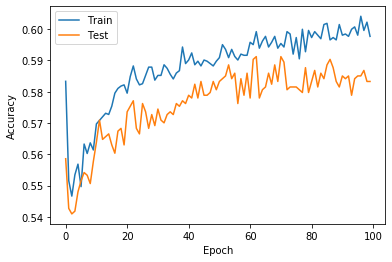

The max accurcy on the test set is 0.59118944
Red wins 0.5851907820173782 % and 0.5779735682819384 % of the training and test fights respectivly


In [140]:
#just one nuron 
TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.3)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

Optimiser=keras.optimizers.SGD(learning_rate=0.0005)

Model=keras.Sequential()
Model.add(keras.layers.Dense(1,input_dim=np.shape(TrainX)[1],activation='elu'))
Model.add(keras.layers.Dense(1,activation="sigmoid"))

Model.compile(loss="binary_crossentropy",optimizer=Optimiser,metrics=["accuracy"])


History=Model.fit(TrainX,TrainY,batch_size=30,epochs=100,validation_data=(TestX,TestY),verbose=0)
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()    

print("The max accurcy on the test set is",np.max(History.history["val_accuracy"]))
print("Red wins",np.mean(TrainY),"% and",np.mean(TestY),"% of the training and test fights respectivly")

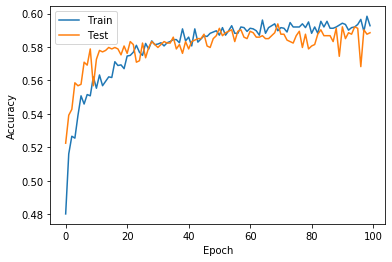

The max accurcy on the test set is 0.5938326
Red wins 0.5855685681904043 % and 0.5770925110132159 % of the training and test fights respectivly


In [141]:
TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.3)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

Optimiser=keras.optimizers.SGD(learning_rate=0.0001)

Model=keras.Sequential()
Model.add(keras.layers.Dense(6,input_dim=np.shape(TrainX)[1],activation='elu'))
Model.add(keras.layers.Dense(6,activation='elu'))
Model.add(keras.layers.Dense(1,activation="sigmoid",))

Model.compile(loss="binary_crossentropy",optimizer=Optimiser,metrics=["accuracy"])


History=Model.fit(TrainX,TrainY,batch_size=10,epochs=100,validation_data=(TestX,TestY),verbose=0)
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()    

print("The max accurcy on the test set is",np.max(History.history["val_accuracy"]))
print("Red wins",np.mean(TrainY),"% and",np.mean(TestY),"% of the training and test fights respectivly")


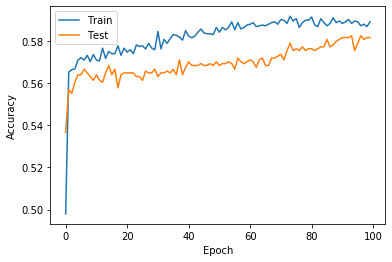

Red wins 0.5765017000377786 % and 0.5982378854625551 % of the training and test fights respectivly
The max accurcy on the test set is 0.58237886


In [142]:
TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.3)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

Optimiser=keras.optimizers.SGD(learning_rate=0.00005)

Model=keras.Sequential()
Model.add(keras.layers.Dense(12,input_dim=np.shape(TrainX)[1],activation='elu',kernel_initializer=keras.initializers.he_normal(seed=None)))
Model.add(keras.layers.Dense(12,activation='elu',kernel_initializer=keras.initializers.he_normal(seed=None)))
Model.add(keras.layers.Dense(12,activation='elu',kernel_initializer=keras.initializers.he_normal(seed=None)))
Model.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer=keras.initializers.he_normal(seed=None)))

Model.compile(loss="binary_crossentropy",optimizer=Optimiser,metrics=["accuracy"])


History=Model.fit(TrainX,TrainY,batch_size=10,epochs=100,validation_data=(TestX,TestY),verbose=0)
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()    

print("Red wins",np.mean(TrainY),"% and",np.mean(TestY),"% of the training and test fights respectivly")
print("The max accurcy on the test set is",np.max(History.history["val_accuracy"]))

Lets add some more layers and increase the number of neurons in each layer.

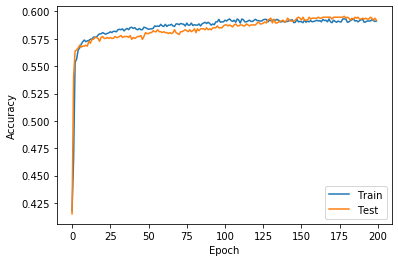

Red wins 0.5821684926331696 % and 0.5850220264317181 % of the training and test fights respectivly
The max accurcy on the test set is 0.5955947


In [144]:
TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.3)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

Optimiser=keras.optimizers.SGD(learning_rate=0.0001)

Model=keras.Sequential()
Model.add(keras.layers.Dense(32,input_dim=np.shape(TrainX)[1],activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(1,activation="sigmoid"))

Model.compile(loss="binary_crossentropy",optimizer=Optimiser,metrics=["accuracy"])


History=Model.fit(TrainX,TrainY,batch_size=30,epochs=200,validation_data=(TestX,TestY),verbose=0)
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()    

print("Red wins",np.mean(TrainY),"% and",np.mean(TestY),"% of the training and test fights respectivly")
print("The max accurcy on the test set is",np.max(History.history["val_accuracy"]))

Lets drop the NaNs and see if there is much improvement. 

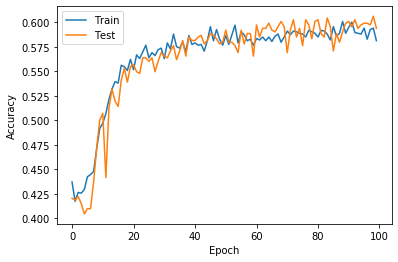

The max accurcy on the test set is 0.60600704
Red wins 0.575 % and 0.5830388692579506 % of the training and test fights respectivly


In [157]:
Data=pd.read_pickle("ufcdata/DataAndCentralities.pkl")
Data["centrality_difference/total"] = (Data["R_centrality"] - Data["B_centrality"])/Data["total_centrality"]
Data["centrality_difference/product"] = (Data["R_centrality"] - Data["B_centrality"])/(Data["R_centrality"]*Data["B_centrality"])
Data=Data.dropna()

#just one nuron 
TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.3)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

Optimiser=keras.optimizers.SGD(learning_rate=0.001)

Model=keras.Sequential()
Model.add(keras.layers.Dense(1,input_dim=np.shape(TrainX)[1],activation='elu'))
Model.add(keras.layers.Dense(1,activation="sigmoid"))

Model.compile(loss="binary_crossentropy",optimizer=Optimiser,metrics=["accuracy"])


History=Model.fit(TrainX,TrainY,batch_size=10,epochs=100,validation_data=(TestX,TestY),verbose=0)
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()    

print("The max accurcy on the test set is",np.max(History.history["val_accuracy"]))
print("Red wins",np.mean(TrainY),"% and",np.mean(TestY),"% of the training and test fights respectivly")

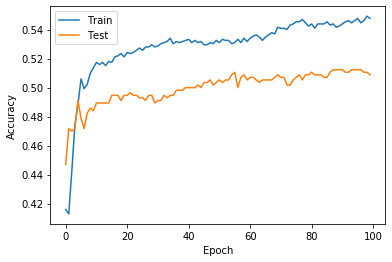

The max accurcy on the test set is 0.5123675
Red wins 0.5856060606060606 % and 0.558303886925795 % of the training and test fights respectivly


In [170]:
TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.3)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

Optimiser=keras.optimizers.SGD(learning_rate=0.0001)

Model=keras.Sequential()
Model.add(keras.layers.Dense(6,input_dim=np.shape(TrainX)[1],activation='elu'))
Model.add(keras.layers.Dense(6,activation='elu'))
Model.add(keras.layers.Dense(1,activation="sigmoid",))

Model.compile(loss="binary_crossentropy",optimizer=Optimiser,metrics=["accuracy"])


History=Model.fit(TrainX,TrainY,batch_size=30,epochs=100,validation_data=(TestX,TestY),verbose=0)
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()    

print("The max accurcy on the test set is",np.max(History.history["val_accuracy"]))
print("Red wins",np.mean(TrainY),"% and",np.mean(TestY),"% of the training and test fights respectivly")


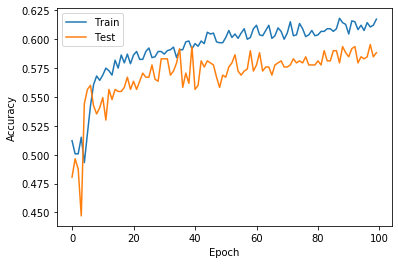

Red wins 0.5727272727272728 % and 0.588339222614841 % of the training and test fights respectivly
The max accurcy on the test set is 0.59540635


In [180]:
TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.3)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

Optimiser=keras.optimizers.SGD(learning_rate=0.0005)

Model=keras.Sequential()
Model.add(keras.layers.Dense(12,input_dim=np.shape(TrainX)[1],activation='elu',kernel_initializer=keras.initializers.he_normal(seed=None)))
Model.add(keras.layers.Dense(12,activation='elu',kernel_initializer=keras.initializers.he_normal(seed=None)))
Model.add(keras.layers.Dense(12,activation='elu',kernel_initializer=keras.initializers.he_normal(seed=None)))
Model.add(keras.layers.Dense(1,activation="sigmoid",kernel_initializer=keras.initializers.he_normal(seed=None)))

Model.compile(loss="binary_crossentropy",optimizer=Optimiser,metrics=["accuracy"])


History=Model.fit(TrainX,TrainY,batch_size=20,epochs=100,validation_data=(TestX,TestY),verbose=0)
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()    

print("Red wins",np.mean(TrainY),"% and",np.mean(TestY),"% of the training and test fights respectivly")
print("The max accurcy on the test set is",np.max(History.history["val_accuracy"]))

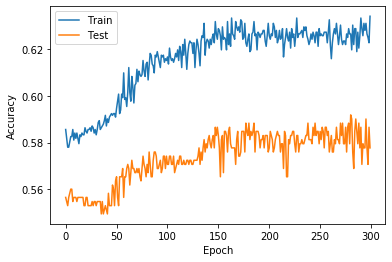

Red wins 0.5856060606060606 % and 0.558303886925795 % of the training and test fights respectivly
The max accurcy on the test set is 0.5918728


In [183]:
TrainX,TestX,TrainY,TestY=train_test_split(Data[Features].copy(),Data["Winner"].copy(),test_size=0.3)

TransformData=StandardScaler()
TransformData.fit_transform(TrainX)
TransformData.transform(TestX)

Optimiser=keras.optimizers.SGD(learning_rate=0.0005)

Model=keras.Sequential()
Model.add(keras.layers.Dense(32,input_dim=np.shape(TrainX)[1],activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(32,activation='elu'))
Model.add(keras.layers.Dense(1,activation="sigmoid"))

Model.compile(loss="binary_crossentropy",optimizer=Optimiser,metrics=["accuracy"])


History=Model.fit(TrainX,TrainY,batch_size=30,epochs=300,validation_data=(TestX,TestY),verbose=0)
plt.plot(History.history["accuracy"])
plt.plot(History.history["val_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()    

print("Red wins",np.mean(TrainY),"% and",np.mean(TestY),"% of the training and test fights respectivly")
print("The max accurcy on the test set is",np.max(History.history["val_accuracy"]))

The neural networks do not appear to be able uncover any new relationships. The accuracy is only marginally better than guessing Red for every fight. It seems as though more predictive features will need to be constructed.    